# week8

## Lossless compression

Part of the multimedia revolution we are experiencing. Compression is divided in 2 types: Lossless, or Loss Free (reversible) Compression and Lossy Techniques (irreversible but controlled and maintaining an acceptable quality). In general, Images and videos have statistically speaking, repeated information we can discard or information human eye is unable to see. 

The smallest possible rate of the source encoding is equal to the Entropy of the source (1948) i.e. the uncertainty of the source. We'll discuss encoding techniques, Huffman, prediction errors... 

This week we'll discuss about Lossless compression.


We general compress for several applications. In fact without compression we will have: 

- Telephony (220-3400Hz) -> 8000samples* 12bitsamples=96kbps

- Wideband speech (50-7000Hz) -> 16000samples* 14bitsamples=224kbps

- Wideband audio (20-20000Hz) -> 1412Mbps

- ColorImages  -> 512*512 pixels* 24bitperpixel=786Kb

- Video (CCIR601) -> 166 Mbps

- HDTV -> 1.3 Gbps

- HDTV needs to be compressed 70 times to fit into a 6MHz channel.

Signals are compressible because of the Redundancy or structure in the data. For example, pure white noise cannot be efficiently compressed. We look mainly at the covariance of a signal. In compression we are interested in the error so that the value can be reconstructed afterwards. Same holds with video (which uses temporal redundancy). 

We naturally have lots of perceptually irrelevvant information. There's lots of literature about it.

Compression Applications have been proliferating over 50years, including lot of theory, distortion, jpegs, Unparelleled DSP, technological advances in computer, networks and telecommunication. 

In Lossless Compression we have exact Reconstruction. The Compression Ratio quantifies this. The greatest the number, the better the compression. As said, we can't go over the Entropy of the signal. For Lossless compression, the ratios are usually low, but applications are still many like in Medical Applications. A Codec (source encoding and decoding) is also chosen based on the delay needed to compress a signal. 

We'll see statistical Methods (Huffman, Extended Huffman, Gilbert, Fano; Applications: Fax) and Universal Methods (Arithmetic Coding, Dictionary Techniques, Adaptive Huffman; Applications: JBIG, GIF,...):





### Elements of Information Theory

With text we have to convert in zeros and ones. We can use letters, as in ASCII. We can do better, though. With variable encodes and entropy, for example.
Any information can be viewed as a source. The simplest is a Discrete and Without Memory Source: the DMS, for which successive symbols are independent with each other. 

The self-information (the information procuded by the occurrance of a certain event) should be inversely proportional to the frequency of occurrance of such an event. For example, this:

$$
I(s_i)=\log_2\frac{1}{p_i}=-\log_2 p_i
$$

Will be using a $\log_2$ therefore it's in terms of bits. If the probability is low, then this self-information $I$ is high. Independent events can be multiplied with each other to evaluate the total probability:

$$
I(s_1,s_2)=\log\frac{1}{p(s_1,s_2)}=I(s_1)+I(s_2)
$$

Let's define the Entropy of a DMS source, i.e. the Average Information per Symbol, which has unit [bit]:

$$
H(S)=\sum\limits_{i=1}^{n} p_i I(s_i) = -\sum\limits_{i=1}^{n} p_i \log_2(p_i) 
$$

Say we have an alphabet with 2 values, the Entropy will be:

$$
H = -p \log_2(p) - (1-p) \log_2(1-p)
$$

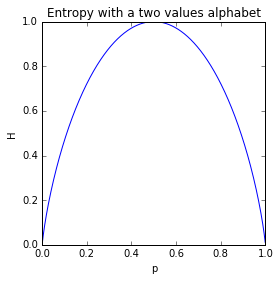

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

p = np.arange(1,1000)/1000.
H = -p*np.log2(p) - (1-p)*np.log2(1-p)

fig=plt.figure(figsize=(4, 4))
ax1=plt.subplot(1, 1, 1)
plt.plot(p,H)
plt.title('Entropy with a two values alphabet')
plt.ylabel('H')
plt.xlabel('p')


Let's describe the Source Coding Problem. Say we have an Alphabet $A={s_1,s_2,...s_n}$, the source should map binary symbols into codewords with fixed ASCII [000,001,010,...] or variable length VLC [0,1,10,...] of length $(l_i)$. The Average Codeword Length is:

$$
l_{avg} = \sum\limits_{i=1}^n l_i p_i
$$

With VLC the Morse Principle should apply: length is inversely proportional to frequency. We can define: 

- First Order Coders: encode one symbol at a time, independently of other symbols.

- Block Codes: each block $N$ is considered as a single source symbol generated by $S_N$ with alphabet size $n^N$. In this case: $H(S_N)=N \cdot H(S)$.

- And finally Non-Block Codes (like arithmetic codes...)

With the Source Coding Theorem (Shannon, 1948), we have that:

$$
H(S) \leq l_{avg} \leq H(S)+\delta
$$

This tells that the Entropy is the lower boundary of the efficiency of the code. Our rate $l$ cannot be better than Entropy. Also, if we increase the size of the block (with $\delta > 0$ small) we can get close to the Entropy, but then we need a large alphabet and a low decodability. 


Estimating the Entropy of a Source is a challenging task. For example, the Entropy of the English Language as a DMS, gives 4.76, but we could do better (smaller Entropy) taking into account the interdependencies among letters.

In general, the importance of the structure of data is very important. Let's see two examples.

In [2]:
import numpy as np

data = [1,2,3,4,3,2,3,4,5,6]
print 'data=' + str(data)

d=list(set(data))
p = [0]*len(d)
H = [0]*len(d)
for ii in range(len(p)):
    p[ii]=data.count(d[ii]) / float(len(data))
    H[ii]=-p[ii]*np.log2(p[ii])
    
print 'H='+ str(sum(H)) + ' bits/s'


data=[1, 2, 3, 4, 3, 2, 3, 4, 5, 6]
H=2.44643934467 bits/s


Here is clearly a structure. We should define a Prediction Model to the data $x_n=x_{n-1}+r_n$ with $r$ residual. Then:

In [3]:
import numpy as np

data = [1,2,3,4,3,2,3,4,5,6]
residual = [1,1,1,1,-1,-1,1,1,1,1]
print 'data=' + str(data)
print 'residual=' + str(residual)

d=list(set(residual))
p = [0]*len(d)
H = [0]*len(d)
for ii in range(len(p)):
    p[ii]=residual.count(d[ii]) / float(len(residual))
    H[ii]=-p[ii]*np.log2(p[ii])
    
print 'H='+ str(sum(H)) + ' bits/s'


data=[1, 2, 3, 4, 3, 2, 3, 4, 5, 6]
residual=[1, 1, 1, 1, -1, -1, 1, 1, 1, 1]
H=0.721928094887 bits/s


which shows a much lower entropy. Given the predictor model and the residual, I can in general reduce $H$. Let's see another example:

In [4]:
import numpy as np

data1 = [3,3,4,5,3,3,3,3,4,5,4,5]
data2 = [33,45,33,33,45,45]
print 'data1=' + str(data1)
print 'data2=' + str(data2)

d1=list(set(data1))
p1 = [0]*len(d1)
H1 = [0]*len(d1)
for ii in range(len(p1)):
    p1[ii]=data1.count(d1[ii]) / float(len(data1))
    H1[ii]=-p1[ii]*np.log2(p1[ii])

d2=list(set(data2))
p2 = [0]*len(d2)
H2 = [0]*len(d2)
for ii in range(len(p2)):
    p2[ii]=data2.count(d2[ii]) / float(len(data2))
    H2[ii]=-p2[ii]*np.log2(p2[ii])
    
print 'H1='+ str(sum(H1)) + ' bits/s'
print 'H2='+ str(sum(H2)) + ' bits/s'

data1=[3, 3, 4, 5, 3, 3, 3, 3, 4, 5, 4, 5]
data2=[33, 45, 33, 33, 45, 45]
H1=1.5 bits/s
H2=1.0 bits/s


Let's now find  $H$ given the probabilities, and verify if a code is good one.

In [5]:
import numpy as np
import pandas as pd

indexes = ['s1','s2','s3','s4','AverageLength']
columns = ['Probability','Code1','Code2','Code3','Code4']
Probability = [1./2,1./4,1./8,1./8,np.NaN]
H = [-p*np.log2(p) for p in Probability[:-1]]
Code1 = ['0','0','1','10']
Code2 = ['0','1','00','11']
Code3 = ['0','10','110','111']
Code4 = ['0','01','011','0111']

p = Probability[:-1]

l1 = [0]*(len(Probability)-1)
for ii in range(len(Probability)-1):
    l1[ii]=len(Code1[ii])
l1avg = np.sum(np.multiply(l1,p))
Code1.append(l1avg)

l2 = [0]*(len(Probability)-1)
for ii in range(len(Probability)-1):
    l2[ii]=len(Code2[ii])
l2avg = np.sum(np.multiply(l2,p))
Code2.append(l2avg)

l3 = [0]*(len(Probability)-1)
for ii in range(len(Probability)-1):
    l3[ii]=len(Code3[ii])
l3avg = np.sum(np.multiply(l3,p))
Code3.append(l3avg)

l4 = [0]*(len(Probability)-1)
for ii in range(len(Probability)-1):
    l4[ii]=len(Code4[ii])
l4avg = np.sum(np.multiply(l4,p))
Code4.append(l4avg)

df = pd.DataFrame(index=indexes, columns=columns )
df['Probability']=Probability
df['Code1']=Code1
df['Code2']=Code2
df['Code3']=Code3
df['Code4']=Code4

print 'H='+ str(sum(H)) + ' bits/symbol'
print df


H=1.75 bits/symbol
               Probability  Code1 Code2 Code3  Code4
s1                   0.500      0     0     0      0
s2                   0.250      0     1    10     01
s3                   0.125      1    00   110    011
s4                   0.125     10    11   111   0111
AverageLength          NaN  1.125  1.25  1.75  1.875


Above, Code 1 is not uniquely Decipherable. As well, Code 2 is not Uniquely Decodable (UD). Code 3 is uniquely decodable because No Codeword is Prefix to Another, and instantaneous! Code 4 is also Decodable, although not prefix. Code 3 seems the best.  Prefix codes are instantaneously decodable. In Binary Tree Representation, we can see the structure of data by assigning 0 to left and 1 right branches. The last terms are called Leaf Nodes.

### Huffman Coding (1951)

Based on Morse Principle (Prefixed and thus UD). Huffman Coding allows for extending Source. Symbols that occur more often will have shorter codewords (Morse). The two symbols that occur least freq. have the same length. The steps are:

- Sort the symbols (according to probability)

- Combine the least probable symbols to form a composite symbol with probability equals to the sum of the respective symbol probabilities.

- Repeat procedure for remaining symbols

- Extract codewords from the resulting binary tree.

Now, let's see some examples:

In [6]:
import numpy as np
import pandas as pd

indexes = ['s1','s2','s3','s4','s5']
columns = ['Probability','Code']
Probability = [0.2,0.4, 0.2, 0.1, 0.1]

df = pd.DataFrame(index=indexes, columns=columns )
df['Probability']=Probability

print df
print ''
print '{s4, s5} have the smallest probability. Their sum is 0.2'
print '{s3, {s4, s5}} have the smallest probability. Their sum is 0.4'
print '{s1, s2} have the smallest probability. Their sum is 0.6'
print '...'
print ''
print 'Now, we can assign zeros and ones, so that the Huffman code is:'
print ''

Code = ['11','10','01', '001', '000']
df['Code']=Code
print df 

H = [-p*np.log2(p) for p in Probability]
p = Probability

l = [0]*(len(Probability))
for ii in range(len(Probability)):
    l[ii]=len(Code[ii])
lavg = np.sum(np.multiply(l,p))

print ''
print 'H = ' + str(sum(H)) + ' bits/symbol'
print 'l_avg = ' + str(lavg) + ' bits/symbol'


    Probability Code
s1          0.2  NaN
s2          0.4  NaN
s3          0.2  NaN
s4          0.1  NaN
s5          0.1  NaN

{s4, s5} have the smallest probability. Their sum is 0.2
{s3, {s4, s5}} have the smallest probability. Their sum is 0.4
{s1, s2} have the smallest probability. Their sum is 0.6
...

Now, we can assign zeros and ones, so that the Huffman code is:

    Probability Code
s1          0.2   11
s2          0.4   10
s3          0.2   01
s4          0.1  001
s5          0.1  000

H = 2.12192809489 bits/symbol
l_avg = 2.2 bits/symbol


We can see that the longest codes are assigned to the least frequent. Also, we see that Huffman code is not unique, however it is Prefixed (thus UD), and the average length is always the same. These are the properties of Huffman code:

$$
H(S) \leq R < H(S)+1
$$

$$
p_{max} < 0.5 \rightarrow R < H(S) + p_{max} 
$$

$$
p_{max} \geq 0.5 \rightarrow R < H(S) + p_{max}  + 0.086
$$

with $p_{max}$ the max probability of a symbol.
The best possible code is when $p_i=2^{-i}$, because then $R=H(S)$. Furthemore, if alphabet size is large, $p_{max}$ is generally small, therefore Huffman code performs well.

Let's see the Huffman Code for extended Source ($H(S)=N \cdot H(S)$):

$$
H(S_N) \leq R_N < H(S_N)+1
$$

$$
N \cdot H(S) \leq N\cdot R < N\cdot H(S)+1  \rightarrow H(S) \leq R < H(S)+\frac{1}{N}
$$

Tradeoff: blocking increases number of possible codewords, i.e. increasing storage, computation, delay. Let's see an example.



In [7]:
import numpy as np
import pandas as pd

indexes = ['s1','s2','s3']
columns = ['Probability','Code']
Probability = [0.8,0.02, 0.18]

df = pd.DataFrame(index=indexes, columns=columns )
df['Probability']=Probability

Code = ['0','11','10']
df['Code']=Code
print df 

H = [-p*np.log2(p) for p in Probability]
p = Probability

l = [0]*(len(Probability))
for ii in range(len(Probability)):
    l[ii]=len(Code[ii])
lavg = np.sum(np.multiply(l,p))

print ''
print 'H = ' + str(sum(H)) + ' bits/symbol'
print 'l_avg = ' + str(lavg) + ' bits/symbol'
print 'Redundancy = ' + str(lavg-sum(H)) + ' bits/symbol ' + 'OR ' + str(100*(lavg-sum(H))/sum(H))+' %'


    Probability Code
s1         0.80    0
s2         0.02   11
s3         0.18   10

H = 0.815727213605 bits/symbol
l_avg = 1.2 bits/symbol
Redundancy = 0.384272786395 bits/symbol OR 47.1080013006 %


Here $n=3$, $N=2$, $3^2=9$. If we create the alphabet of the extended source (multiplying the probabilities), here is an example that works well:

In [8]:
import numpy as np
import pandas as pd

indexes = ['s1s1','s1s2','s1s3','s2s1','s2s2','s2s3','s3s1','s3s2','s3s3']
columns = ['Probability','Code']
Probability = [0.8,0.02, 0.18]
Probability_ext = [Probability[0]*Probability[0],Probability[0]*Probability[1],Probability[0]*Probability[2],
                  Probability[1]*Probability[0],Probability[1]*Probability[1],Probability[1]*Probability[2],
                  Probability[2]*Probability[0],Probability[2]*Probability[1],Probability[2]*Probability[2]]

df = pd.DataFrame(index=indexes, columns=columns )
df['Probability']=Probability_ext

Code = ['0','10101','11','101000','10100101','1010011','100','10100100','1011']
df['Code']=Code
print df 

H = [-p*np.log2(p) for p in Probability_ext]
p = Probability_ext

l = [0]*(len(Probability_ext))
for ii in range(len(Probability_ext)):
    l[ii]=len(Code[ii])
lavg = np.sum(np.multiply(l,p))

print ''
print 'l_avg = ' + str(lavg) + ' bits/newsymbol'
print 'l_avg = ' + str(lavg/2.) + ' bits/symbol'
print 'Redundancy = ' + str(lavg-sum(H)) + ' bits/symbol ' + 'OR ' + str(100*(lavg-sum(H))/sum(H))+' %'


      Probability      Code
s1s1       0.6400         0
s1s2       0.0160     10101
s1s3       0.1440        11
s2s1       0.0160    101000
s2s2       0.0004  10100101
s2s3       0.0036   1010011
s3s1       0.1440       100
s3s2       0.0036  10100100
s3s3       0.0324      1011

l_avg = 1.7228 bits/newsymbol
l_avg = 0.8614 bits/symbol
Redundancy = 0.0913455727896 bits/symbol OR 5.59902693364 %


Here is an example that does not work well, that has a very skewed probability, with three length of alphabet and a big $p_{max}$:


In [9]:
import numpy as np
import pandas as pd

indexes = ['s1','s2','s3']
columns = ['Probability','Code']
Probability = [0.95,0.02, 0.03]

df = pd.DataFrame(index=indexes, columns=columns )
df['Probability']=Probability

Code = ['0','11','10']
df['Code']=Code
print df 

H = [-p*np.log2(p) for p in Probability]
p = Probability

l = [0]*(len(Probability))
for ii in range(len(Probability)):
    l[ii]=len(Code[ii])
lavg = np.sum(np.multiply(l,p))

print ''
print 'H = ' + str(sum(H)) + ' bits/symbol'
print 'l_avg = ' + str(lavg) + ' bits/symbol'
print 'Redundancy = ' + str(lavg-sum(H)) + ' bits/symbol ' + 'OR ' + str(100*(lavg-sum(H))/sum(H))+' %'


    Probability Code
s1         0.95    0
s2         0.02   11
s3         0.03   10

H = 0.334944486839 bits/symbol
l_avg = 1.05 bits/symbol
Redundancy = 0.715055513161 bits/symbol OR 213.484783676 %


We can improve the performance by extending the code:

In [10]:
import numpy as np
import pandas as pd

indexes = ['s1s1','s1s2','s1s3','s2s1','s2s2','s2s3','s3s1','s3s2','s3s3']
columns = ['Probability','Code']
Probability = [0.95,0.02, 0.03]
Probability_ext = [Probability[0]*Probability[0],Probability[0]*Probability[1],Probability[0]*Probability[2],
                  Probability[1]*Probability[0],Probability[1]*Probability[1],Probability[1]*Probability[2],
                  Probability[2]*Probability[0],Probability[2]*Probability[1],Probability[2]*Probability[2]]

df = pd.DataFrame(index=indexes, columns=columns )
df['Probability']=Probability_ext

Code = ['0','111','100','1101','110011','110001','101','110010','110000']
df['Code']=Code
print df 

H = [-p*np.log2(p) for p in Probability_ext]
p = Probability_ext

l = [0]*(len(Probability_ext))
for ii in range(len(Probability_ext)):
    l[ii]=len(Code[ii])
lavg = np.sum(np.multiply(l,p))

print ''
print 'l_avg = ' + str(lavg) + ' bits/newsymbol'
print 'l_avg = ' + str(lavg/2.) + ' bits/symbol'
print 'Redundancy = ' + str(lavg-sum(H)) + ' bits/symbol ' + 'OR ' + str(100*(lavg-sum(H))/sum(H))+' %'


      Probability    Code
s1s1       0.9025       0
s1s2       0.0190     111
s1s3       0.0285     100
s2s1       0.0190    1101
s2s2       0.0004  110011
s2s3       0.0006  110001
s3s1       0.0285     101
s3s2       0.0006  110010
s3s3       0.0009  110000

l_avg = 1.2215 bits/newsymbol
l_avg = 0.61075 bits/symbol
Redundancy = 0.551611026323 bits/symbol OR 82.3436491714 %


### Run-Length Coding and Fax


FAX application is one of the first applications of Huffman Coding. Zeros and Ones have a structure. The consecutive zeros and ones are called Run-Length, which represent the innovative combinations of single bits. It can be applied directly on FAX: an imgae is scanned, sent, decoded and printed. The Standardization body CCITT has given the rules, depending on the apparatus group (G1 to G4).
G3 and G4 were established for text, therefore for tables and charts the efficiency drops. G4 is ISDN.

Let's look at Run Length Coding, applied on an image in white and black: 0s and 1s. We count instead how many pixel there are in a row. We want to create a Markov model with transition between two states: $S_w$, $S_b$ as white and black. 

$$
H=P(S_w)H(S_w)+P(S_b)H(S_b)
$$

Instead of pixels we should ancode the Run-Lengths (or Runs):
- Estimate Probabilities of runs of white and runs of black pixels
- Follow Huffman encoding procedure.

Even better, we use the Modified Huffman MH:
- Must limit the number of possible lengths,
- 64 decomposition $r_I=64m+t$
- Use codes for $m$ (make-up codes) and $t$ (terminating codes)
- Maximum length 1728

In tables we find $t$ for white and black runs. Also, we can find the make-ups table.  We assume the first pixel is white, thus codeword is 0.

Say we want to encode a runlength of 12 white pixels. Since $12<64$, we look at the codewords for white pixels, which is $001000$ (from the table).

Say we have a runlength of 140 blackpixels, $140=2*64+12$, therefore we have 128+12: $0000110010000000111$. 

In 2d runs, we report the transition times when we move from a state to another, using modified READ (MR), i.e. Relative Element Address Designate, which exploits correlation of image rows and encodes the transition points to previous line or distance from previous point.

### Arithmetic Coding

A Tag is generated. JBIG establish the standards. It is in general more efficient to generate codewords for groups: this is called Block Coding. With Huffman, if we want to encode a sequence of length m, we need codewords for all possible sequences of length m. But the size would become $n^m$. We solve it by applying Arithmetic Coding, in which a unique identifier (Tag) is generated for the sequence, which corresponds to a binary fraction, i.e. the binary code of the sequence.

One possible set of Tags are numbers 0 to 1 (i.e. infinite series). We assign a Cumulative Probability Function. Random Variable $X(a_i)=i$ of an ensembler $A$. This leads to:

$$
pdf \rightarrow P(X=i)=P(a_i)
$$

$$
cdf \rightarrow F_X(i)=\sum\limits^i_{k=1} P(X=k)
$$

The idea is to reduce the size of interval where the tag is, as more and more elements in the sequence are received. Let's look at an example of Tag Generation.

In [11]:
import numpy as np
import pandas as pd

indexes = ['a1','a2','a3']
columns = ['Probability','Cumulative']
P = [0.7,0.1, 0.2]
Fx = np.cumsum(P) # cumulative probability function

df = pd.DataFrame(index=indexes, columns=columns )
df['Probability']=P
df['Cumulative']=Fx

print df 

H = [-p*np.log2(p) for p in P]
p = P

l = [0]*(len(p))
for ii in range(len(p)):
    l[ii]=len(Code[ii])
lavg = np.sum(np.multiply(l,p))

print ''
print 'To any new symbol element, a tag is generated, inside the previous tag interval, and so on.'
print ''
print 'Say the Tag = 0.55 ->'
print 'a1 interval is 0-0.7 -> a1'
print 'a2 interval is 0.49-0.56 -> a2'
print 'a3 interval is 0.546-0.560 -> a3'
print ''
print 'Therefore the Tag is a1a2a3'

    Probability  Cumulative
a1          0.7         0.7
a2          0.1         0.8
a3          0.2         1.0

To any new symbol element, a tag is generated, inside the previous tag interval, and so on.

Say the Tag = 0.55 ->
a1 interval is 0-0.7 -> a1
a2 interval is 0.49-0.56 -> a2
a3 interval is 0.546-0.560 -> a3

Therefore the Tag is a1a2a3


Let's compare Arithmetic Code (AC) vs Huffman:

$$
H(S) \leq R_{Huffman} < H(S)+\frac{1}{N}
$$

$$
H(S) \leq R_{AC} < H(S)+\frac{2}{N}
$$

but Huffman Coding suffers from exploding to size of dictionary, therefore AC reaches values closer to Entropy. Let's tkae the Context into Account. The Context-Content are usually confused. With Context we are looking at the context of the pixel that's being encoded.

Say $P(B)=0.2$, $P(W)=0.8$ -> $H=0.722bpp$. Let's divide the document in two regions. Say: Region 1 has $80\%$ of pixels, $P(W)=0.95$, $P(B)=0.05$, with $H=0.286bpp$. Region 2 has $20\%$ of pixels,  $P(W)=0.3$, $P(W)=0.7$, with $H=0.881bpp$. The total Entropy will be the weighted average of the two $H=0.8H_1+0.2H_2=0.405bbp$. Here the different coders have been used depending on the Context.

Context Adaptive Arithmetic is used by the Standard JBIG (Joint Bi-Level Image Processing Group). JBIG-Progressive Transmission provides an image at different resolutions. JBIG allows for a 2x2 down-sampling. JBIG also uses additional values around at higher resolution. We gat the number of context by using $2^n$.



### Dictionary Techniques

In many application the output of the source is made of recurring patterns. A good approach is to encode sources with a list or dictionary. We could split into two classes: frequent [encoded by dictionaries] and not frequent [encoded by less efficient methods] occurring patterns. We have Static Dictionaries (LZ77) and Adaptive Dictionaries (LZ78).

Static Dictionary:

In [12]:
import numpy as np
import pandas as pd

indexes = ['a1','a2','a3']
columns = ['Code','Entry']
code = ['000','001','010','011','100','101','110','111']
entry = ['a','b','c','d','r','ab','ac','ad']

df = pd.DataFrame(columns=columns )
df['Code']=code
df['Entry']=entry

print df 

print ''
print 'A = {a,b,c,d,r}'
print ''
print 'Say we want to encode: "abracadabra"'
print 'That becomes, with the digrams: "10110010111101100000" which is much less then without digrams'


  Code Entry
0  000     a
1  001     b
2  010     c
3  011     d
4  100     r
5  101    ab
6  110    ac
7  111    ad

A = {a,b,c,d,r}

Say we want to encode: "abracadabra"
That becomes, with the digrams: "10110010111101100000" which is much less then without digrams


In LZ77, the dictionary is a part of the previously encoded sequence. We have Search Buffer $S$ and the look-ahead buffer $W-S$. The distance between a match in the search buffer and the first match in the Look-ahead buffer is called Offset. Then we have the Length of the Match. So what we need to encode is $<o,l,c>$, with $c$ being the code for the next symbol. The bits needed (with fixed length) are a sum of ceilings:

$$
[\log_2 S]+ [ \log_s W] + [ \log_2 |A|]
$$


In [13]:
import numpy as np
import pandas as pd

indexes = ['a1','a2','a3']
columns = ['Code','Entry']
code = ['000','001','010','011','100','101','110','111']
entry = ['a','b','c','d','r','ab','ac','ad']

df = pd.DataFrame(columns=columns )
df['Code']=code
df['Entry']=entry

print df 

print ''
print 'A = {a,b,c,d,r}'
print ''
print 'Say we want to encode: "cabracadabrarrarrad"'
print 'If S=7 and L=6, the buffer goes and find <0,0,c(d)>, <7,4,c(r)>, <3,5,c(d)>'
print 'Therefore that becomes: cabraca -> cabracad -> cabracadabrar -> cabracadabrarrad'

  Code Entry
0  000     a
1  001     b
2  010     c
3  011     d
4  100     r
5  101    ab
6  110    ac
7  111    ad

A = {a,b,c,d,r}

Say we want to encode: "cabracadabrarrarrad"
If S=7 and L=6, the buffer goes and find <0,0,c(d)>, <7,4,c(r)>, <3,5,c(d)>
Therefore that becomes: cabraca -> cabracad -> cabracadabrar -> cabracadabrarrad


In LZ78, we drop the reliance on the search buffer and keep an explicit dictionary. Dictionary has to be built at both encoder and decoder, therefore they have to be identical. What is encoded is $<i,c>$. If it is a new entry, it will be added to the dictionary
Let's see an example:

In [14]:
import numpy as np
import pandas as pd

print ''
print 'We want to encode "bawwa/bawwa/bawwa/bawwa/boo/bo..."'
print ''
print 'Then we have <0,c(b)>, <0,c(a)>, <0,c(w)>, <3,c(a)>, <0,c(/)>, <1,c(a)>, <3,c(w)>, <2,c(/)>, <6,c(w)>,'
print '<4,c(/)>, <9,c(w)>, <8,c(b)>, <0,c(o)>, <13,c(/)>, <1,c(o)>'


We want to encode "bawwa/bawwa/bawwa/bawwa/boo/bo..."

Then we have <0,c(b)>, <0,c(a)>, <0,c(w)>, <3,c(a)>, <0,c(/)>, <1,c(a)>, <3,c(w)>, <2,c(/)>, <6,c(w)>,
<4,c(/)>, <9,c(w)>, <8,c(b)>, <0,c(o)>, <13,c(/)>, <1,c(o)>


Many variations of LZ77 and LZ78 hyave been made. There are many application: Unix compress, GIF, Compression over modems V.42 bis, ...

### Predictive Coding

The idea is to transfer the predictive error to form the reconstructed signal. Lossless compression is error free. The idea is that we can use signal values from the past (in space and time). Reconstruction = Prediction + Prediction Error, the latter being unpredictable. An algorithm that makes use of it is CALIC or (JPEG)-LS.

So, why encoding the prediction Error, anyway? Well, it's much more efficient! It's much more accurate in the flat parts of the image.

$$
x_p(n)=x(n-1) \hspace{2cm} e(n)=x(n)-x_p(n)=x(n)-x(n-1)
$$

Let's see an example where the difference is computed line by line:


H_original > H_error


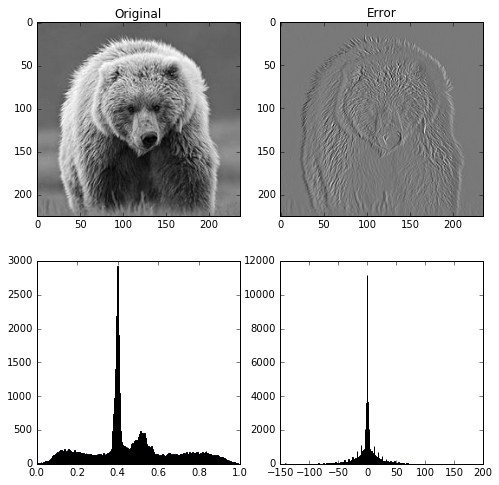

In [15]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal, misc, ndimage
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from skimage import exposure, img_as_float

I = misc.imread(os.path.join('media','bear.png') );
# read in the original, sharp and noise-free image
original = misc.imread(os.path.join('media','bear.png') , mode='L');
H = np.size(original,0)
W = np.size(original,1)
x = range(W)
y = range(H)
[X, Y] = np.meshgrid(x,y);

E = np.zeros((H,W-1))
for xx in range(len(original[:,])):
    E[xx,:] = original[xx,:-1].astype(float) - original[xx,1:].astype(float)

fig=plt.figure(figsize=(8, 8))
ax1=plt.subplot(2, 2, 1)
plt.imshow(original,cmap='gray')
plt.title('Original')

ax2 = fig.add_subplot(222)
plt.imshow(E,cmap='gray')
plt.title('Error')

ax3 = fig.add_subplot(223)
ax3.hist(img_as_float(original).ravel(), bins=256);

ax4 = fig.add_subplot(224)
ax4.hist(img_as_float(E).ravel(), bins=256);

print ''
print 'H_original > H_error'

Let's look at JPEG-LS predictors. Number 0: No prediction. Number 1,2,3: 1D. Number 4,5,6,7: 2D